# Análisis predictivo de series temporales
------

## Análisis exploratorio, regresión lineal y no lineal.

## Modelos lineales

El *modelo lineal* es una herramienta básica de estimación estadística, en particular para estudiar fenómenos *causa-efecto* y realizar regresión.

En el contexto de *series temporales* usaremos modelos lineales (y no lineales) con diferentes objetivos:

 * Obtener información de tendencia y estacionalidad de series.
 
 * Ajustar señales de una familia a una observación dada.
 
 * Ajustar valores de una serie a una función de los valores anteriores (ej: modelos autorregresivos)
 
La idea es repasar entonces cómo se realiza el ajuste de modelos lineales y aplicarlo a diferentes series.

## Regresión lineal en el contexto de series temporales.

Sea $\{x_t\}$, $t=1,\ldots,n$ una serie temporal. Queremos explicar su comportamiento a partir de variables independientes $z_{t_1},\ldots,z_{t_q}$ donde $q$ es la cantidad de variables explicativas en cada $t$.

**Nota:** En la regresión clásica estas variables son completamente independientes, pero en series temporales luego veremos como relajar esto.

Se tiene entonces el **Modelo de Regresión Lineal:**

$$x_t = \beta_1z_{t_1} + \ldots + \beta_qz_{t_q} + w_t.$$

En el modelo:

$$x_t = \beta_1z_{t_1} + \ldots + \beta_qz_{t_q} + w_t.$$

* $\beta_1\ldots\beta_q$ son los parámetros a ajustar
* $z_{t_i}$ son las funciones de regresión a usar, evaluadas en cada $t$.
* $w_t$ es ruido blanco (gaussiano) de varianza $\sigma_w^2$. 

### Ejemplo: estimación de una tendencia lineal

Consideremos los datos de temperatura `gtemp` disponibles en la biblioteca `astsa`. Al parecer estos datos tienen una tendencia creciente. Podemos usar un modelo lineal del tipo:

$$x_t = \beta_1 + \beta_2 t + w_t$$

Aquí $z_{t_1} = 1$ para todo $t$ y $z_{t_2} = t$. Tenemos dos parámetros ($q=2$)

In [1]:
#install.packages("devtools")     # only need to do this once
#devtools::install_github("nickpoison/astsa")
#install.packages("astsa")
library(astsa)
options(repr.plot.width=12, repr.plot.height=7) #ajusta tamaño de graficas


In [2]:
gtemp #para mirar los datos
time(gtemp) #para extraer los tiempos

A Time Series:
  [1] -0.28 -0.21 -0.26 -0.27 -0.32 -0.32 -0.29 -0.36 -0.27 -0.17 -0.39 -0.27
 [13] -0.32 -0.33 -0.33 -0.25 -0.14 -0.11 -0.25 -0.15 -0.07 -0.14 -0.24 -0.30
 [25] -0.34 -0.24 -0.19 -0.39 -0.33 -0.35 -0.33 -0.34 -0.32 -0.30 -0.15 -0.10
 [37] -0.30 -0.39 -0.33 -0.20 -0.19 -0.14 -0.26 -0.22 -0.22 -0.17 -0.02 -0.15
 [49] -0.12 -0.26 -0.08 -0.02 -0.08 -0.19 -0.07 -0.12 -0.05  0.07  0.10  0.01
 [61]  0.04  0.10  0.03  0.09  0.19  0.06 -0.05  0.00 -0.04 -0.07 -0.16 -0.04
 [73]  0.03  0.11 -0.10 -0.10 -0.17  0.08  0.08  0.06 -0.01  0.07  0.04  0.08
 [85] -0.21 -0.11 -0.03 -0.01 -0.04  0.08  0.03 -0.10  0.00  0.14 -0.08 -0.05
 [97] -0.16  0.12  0.01  0.08  0.18  0.26  0.04  0.26  0.09  0.05  0.12  0.26
[109]  0.31  0.19  0.37  0.35  0.12  0.13  0.23  0.37  0.29  0.39  0.56  0.32
[121]  0.33  0.48  0.56  0.55  0.48  0.62  0.54  0.57  0.43  0.57

A Time Series:
  [1] 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894
 [16] 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909
 [31] 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924
 [46] 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939
 [61] 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954
 [76] 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 [91] 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
[106] 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
[121] 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009

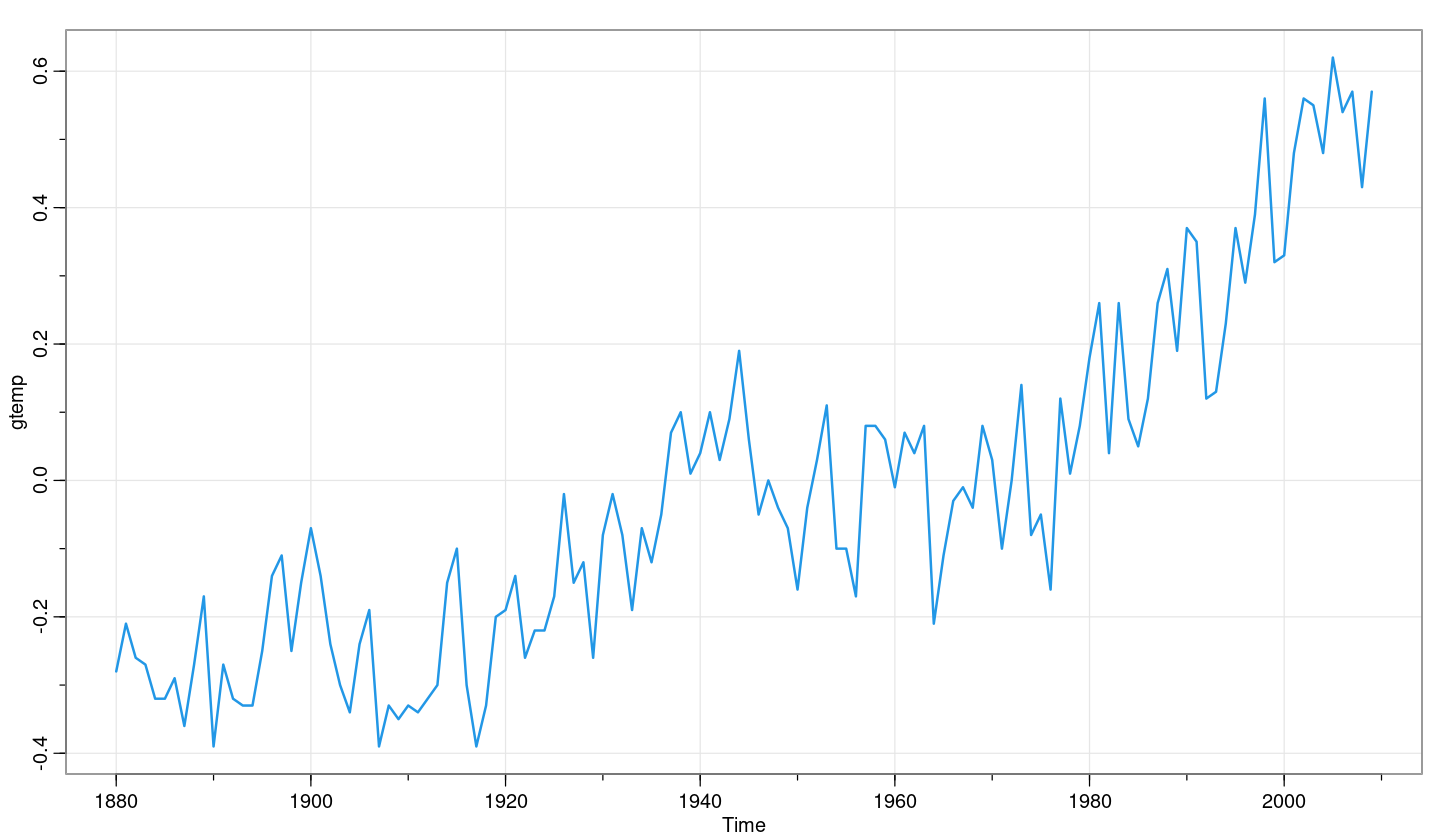

In [3]:
tsplot(gtemp, col=4, lwd=2) #Graficamos

In [4]:
x=gtemp
t=time(gtemp)-1880

fit <- lm(x~t) # regresion lineal
summary(fit) 


Call:
lm(formula = x ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31946 -0.09722  0.00084  0.08245  0.29383 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.3923911  0.0218265  -17.98   <2e-16 ***
t            0.0057485  0.0002925   19.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1251 on 128 degrees of freedom
Multiple R-squared:  0.7511,	Adjusted R-squared:  0.7492 
F-statistic: 386.3 on 1 and 128 DF,  p-value: < 2.2e-16


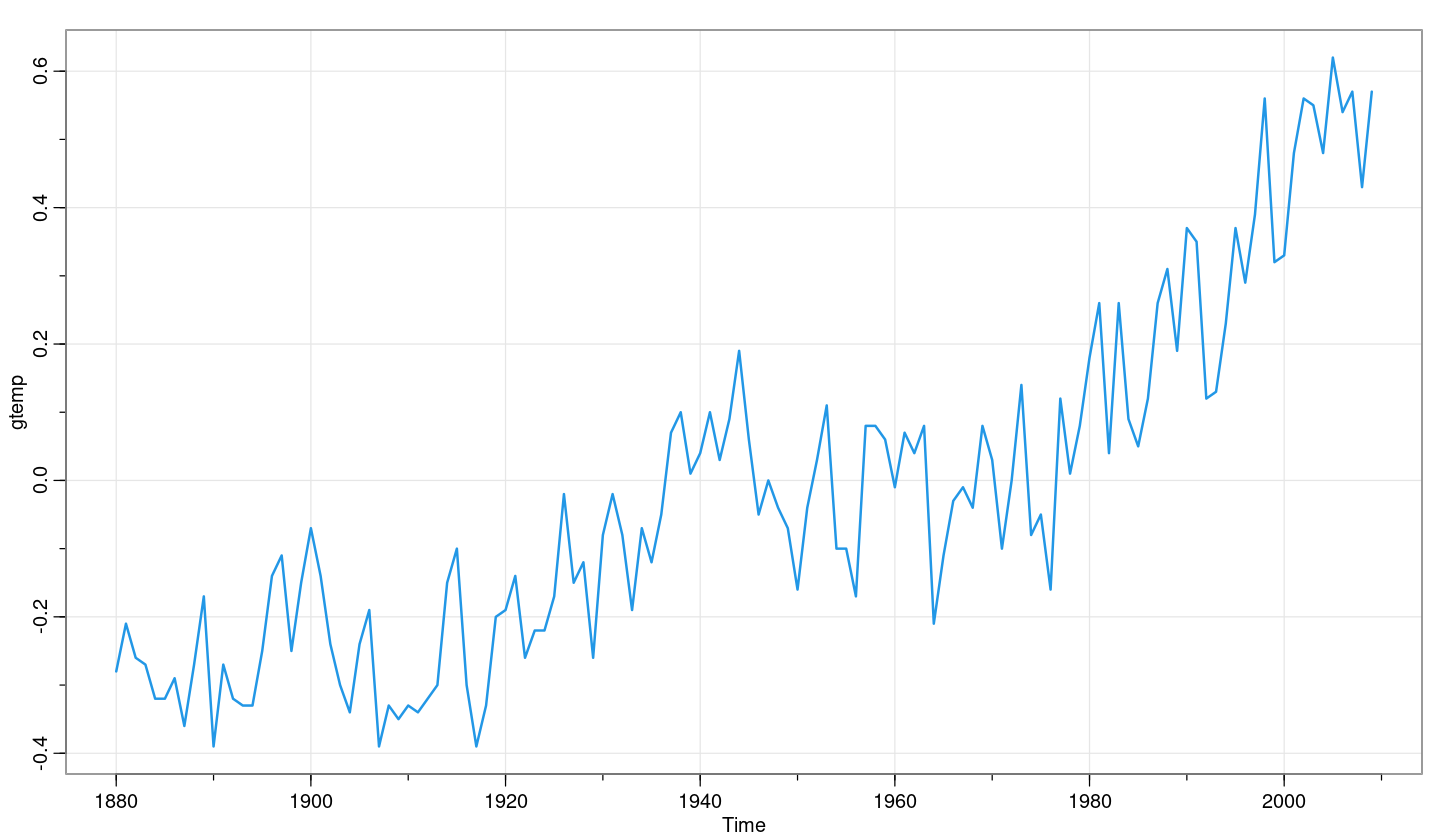

In [5]:
tsplot(gtemp, ylab="gtemp", col=4, lwd=2)
abline(fit)


### ¿Cómo funciona?

Conviene pasarse a notación vectorial, sean los vectores columna:

$$ z_t = (z_{t_1},\ldots,z_{t_q}), \quad \beta = (\beta_1,\ldots,\beta_q).$$

Entonces el valor en $t$ de la serie puede calcularse como:

$$ x_t = \beta^T z_t + w_t $$

(producto de los vectores $\beta$ y $z_t$ más el ruido)

**Pregunta:** ¿Cómo podemos estimar $\beta$?

### Criterio de mínimos cuadrados

Se trata de minimizar la suma de los errores de predicción al cuadrado sobre todos los datos:

$$Q = \sum_{t=1}^n (x_t - \beta^T z_t)^2.$$

La minimización se hace en las variables $\beta_i$. El óptimo se denota $\hat{\beta}$, el estimador por mínimos cuadrados del modelo.

**Observación:** la minimización anterior tiene fórmula exacta!

### Ecuaciones Normales

Derivando la ecuación anterior respecto a cada $\beta_i$ e imponiendo que las derivadas sean $0$ (condición de punto estacionario), se llega al siguiente sistema de ecuaciones para hallar $\hat{\beta}$:

$$\left(\sum_{t=1}^n z_t z_t^T\right)\hat{\beta} = \sum_{t=1}^n z_t x_t.$$

A dicho sistema lineal (de $q$ incógnitas) se le denominan "ecuaciones normales".

### Versión matricial

Se puede simplificar aún más la notación definiendo la matriz:

$$ Z= \left[z_1|\ldots|z_n\right] $$

que tiene como columnas el valor de la función $z_{t_n}$ en cada $t$. Si $x=(x_1,\ldots,x_t)$ las ecuaciones normales quedan:

$$(Z^T Z) \hat{\beta} = Z^T x.$$

y la solución explícita es:

$$\hat{\beta} = (Z^T Z)^{-1} Z^T x.$$

Esto vale siempre que la matriz $(Z^T Z)$ sea invertible (en general si no lo es formulamos mal el modelo)

### Ejemplo: ajuste lineal

Para el caso de un ajuste lineal:
$$x_t = \beta_1 + \beta_2 t + w_t$$
La matrix $Z$ en este caso es:

$$Z = \begin{pmatrix}
1 & t_1 \\
1 & t_2 \\
1 & t_3 \\
\vdots & \vdots \\
1 & t_n
\end{pmatrix}$$

siendo $t_i$ los tiempos de la muestra de la serie (ej: el año en `gtemp`).

### Error cometido y Mean Square Error

El error cometido en la aproximación es simplemente la suma de los cuadrados:

$$\begin{align}
    SSE  &= \sum_{t=1}^n (x_t - \hat{\beta}^T z_t)^2 = (x-Z\hat{\beta})^T (x-Z\hat{\beta}) = x^Tx - \hat{\beta}^TZ^T x\\
         &= x^Tx - x^TZ(Z^TZ)^{-1}Z^T x
         \end{align}$$

El estimador es insesgado, y si los errores son Gaussianos, es el estimador de máxima verosimilitud y está distribuido como una gaussiana de matriz de covarianzas:

$$Cov(\hat{\beta}) = \sigma^2_w (Z^TZ)^{-1} = \sigma^2_w C.$$

El **Error Cuadrático Medio (MSE)** es simplemente:

$$s^2_w = MSE = \frac{SSE}{n-q}$$

y es un estimador insesgado para $\sigma_w^2$, la varianza del error.

### ¿Cómo podemos ver si el ajuste fue bueno?

1. Plotear los residuos. Deberían tener un comportamiento homogéneo.

2. Mirar si los residuos son gaussianos (qqNorm). Esto no es necesario pero si lo son nos ajustamos al modelo anterior perfectamente.

3. Mirar si los residuos son "ruido blanco". Esta es una regla general: si luego de aplicar un modelo lo que queda es "ruido" es que logramos extraer toda la información.

4. Mirar si los mejoramos el ajuste respecto a algo simple (por ejemplo, la media) $\to$ Criterio $R^2$

5. Observar que no hubo sobreajuste (overfitting). Esto puede pasar si tengo demasiados parámetros. $\to$ Criterio de información ($AIC$, $BIC$).

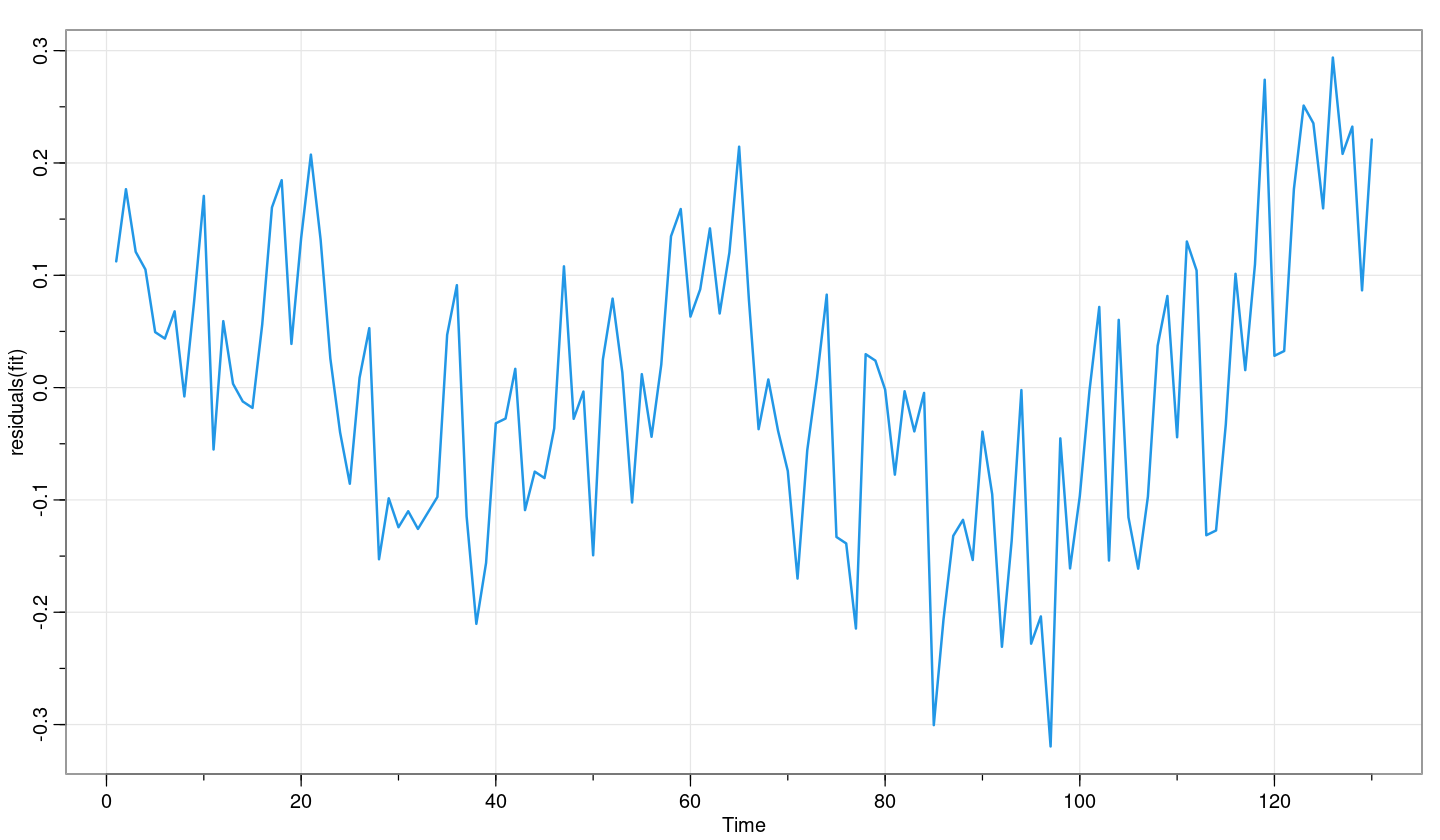

In [6]:
tsplot(residuals(fit),col=4,lwd=2)

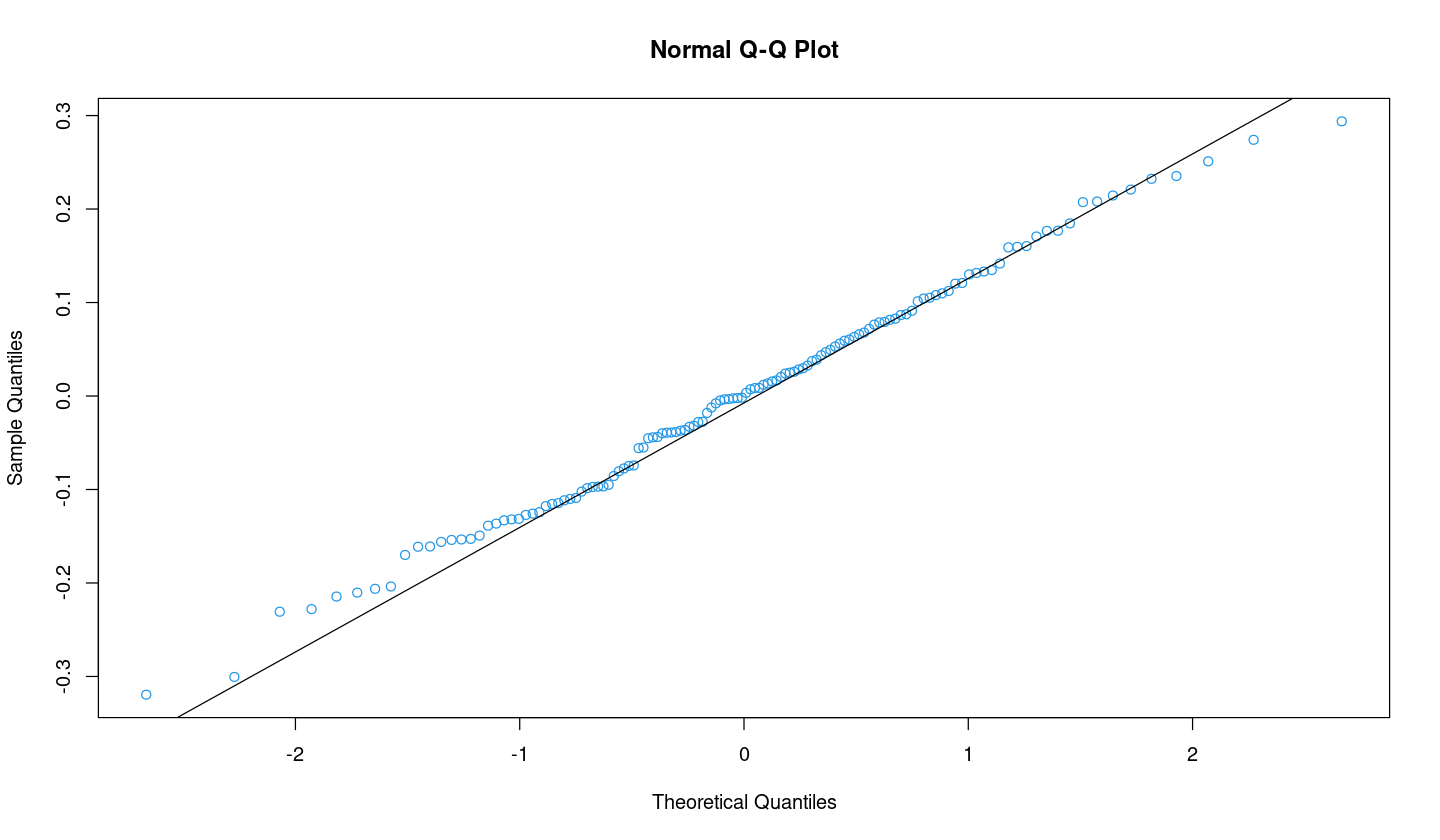

In [7]:
qqnorm(residuals(fit), col=4)
qqline(residuals(fit))

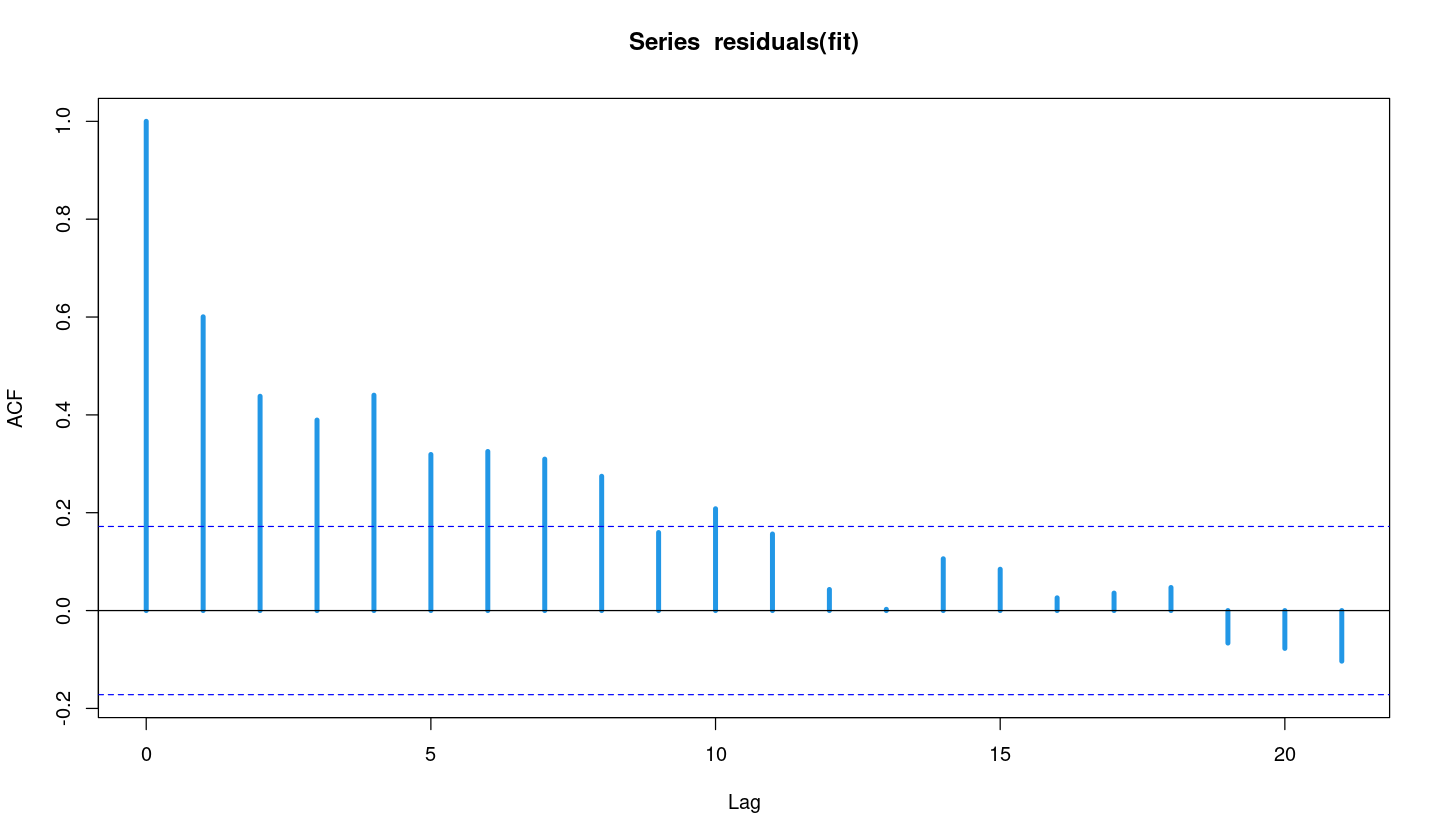

In [8]:
acf(residuals(fit), col=4, lwd=4)

### Evaluación:

Deseamos evaluar si mejoramos el ajuste respecto a algo simple. El modelo lineal más simple es:

$$x_t = \beta_1 + w_t.$$

Es decir, media más ruido. En este caso, la solución es $\hat{\beta}_1 = \bar{x}$, la media de los datos, y el error cuadrático $SSE_1$ es:

$$SSE_1 = \sum_{t=1}^n (x_t - \bar{x})^2.$$

Definimos:

$$R^2 = \frac{SSE_1 - SSE}{SSE_1}.$$

Entonces $R^2$ es una medida de correlación de nuestras variables $z$ con $x$, o bien cuánto mejora el ajuste en términos relativos respecto a la media.

In [9]:
SSE1 = sum((gtemp-mean(gtemp))^2)
SSE = sum(residuals(fit)^2)

R2 = (SSE1-SSE)/SSE1

#muestro los valores
SSE1
SSE
R2



[1] 8.054361

[1] 2.004767

[1] 0.7510954

## Modelos lineales más complejos

Observemos que el modelo lineal general:

$$x_t = \beta_1z_{t_1} + \ldots + \beta_qz_{t_q} + w_t,$$

nada dice que la aproximación tenga que ser por una recta. De hecho es bastante general. Eligiendo los $z_{t_i}$ podemos hacer ajustes más complicados. La razón por la que se llama *lineal* es que los pesos $\beta_i$ entran linealmente en la ecuación, y admiten entonces resolverse por ecuaciones normales.


### Ejemplo: ajustar una tendencia cuadrática a las temperaturas.

Es simplemente considerar:

$$x_t = \beta_1 + \beta_2 t + \beta_3 t^2 + w_t$$

Aquí $z_{t_1} = 1$ para todo $t$, $z_{t_2} = t$ y $z_{t_3} = t^2$. Tenemos tres parámetros ($q=3$)

In [10]:
t = time(gtemp)
t2 = time(gtemp)^2

fit2 <- lm(gtemp~t+t2) # regresion lineal

summary(fit2)


Call:
lm(formula = gtemp ~ t + t2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.300105 -0.080650  0.004134  0.074619  0.280003 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.647e+02  2.916e+01   5.647 1.02e-07 ***
t           -1.752e-01  3.000e-02  -5.840 4.12e-08 ***
t2           4.653e-05  7.714e-06   6.032 1.65e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1108 on 127 degrees of freedom
Multiple R-squared:  0.8065,	Adjusted R-squared:  0.8035 
F-statistic: 264.7 on 2 and 127 DF,  p-value: < 2.2e-16


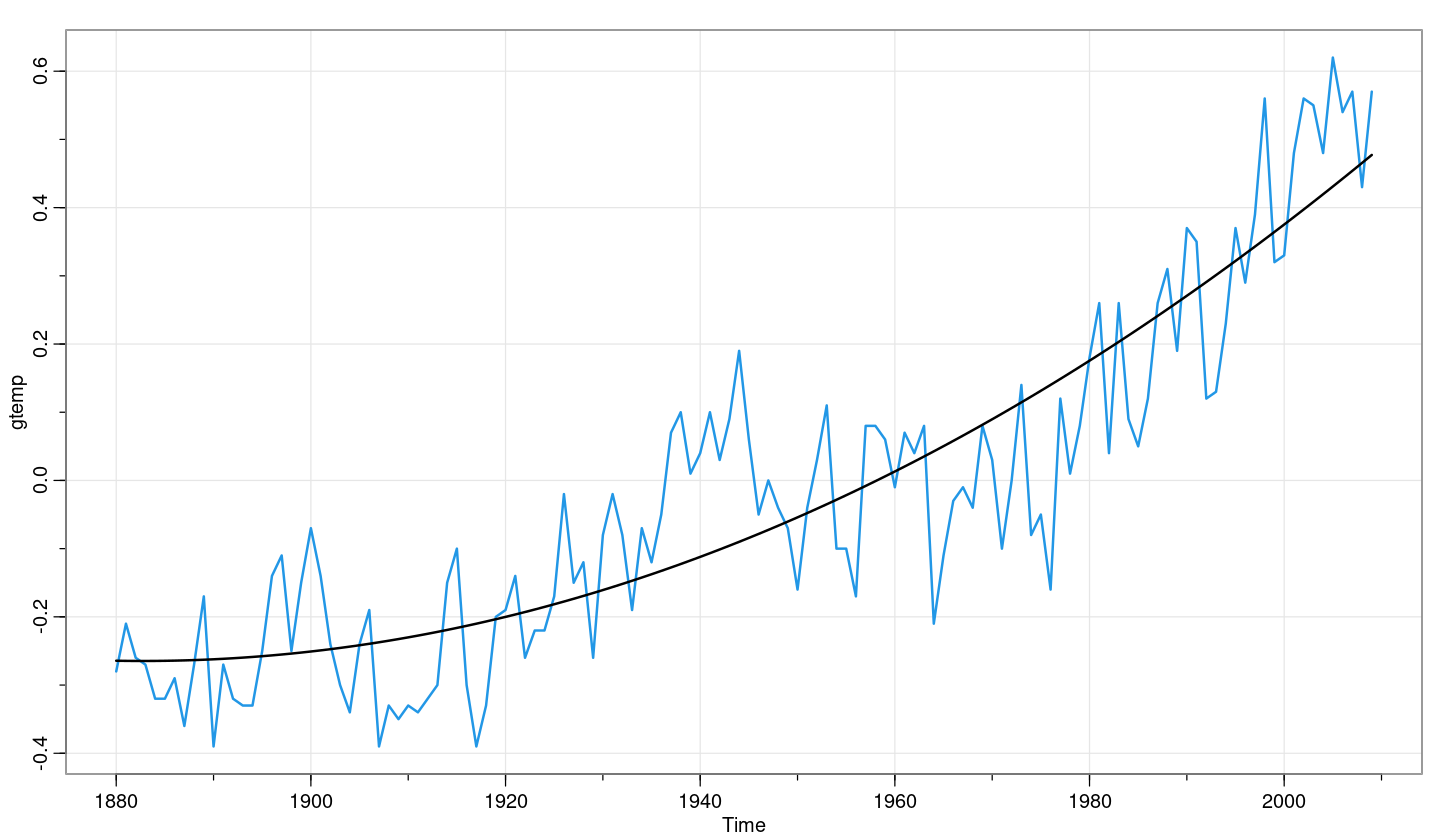

In [11]:
predictions = ts(fitted(fit2), start = 1880) #Creo una serie temporal con los valores ajustados.
tsplot(gtemp, col=4, lwd=2)
lines(predictions, lwd=2)

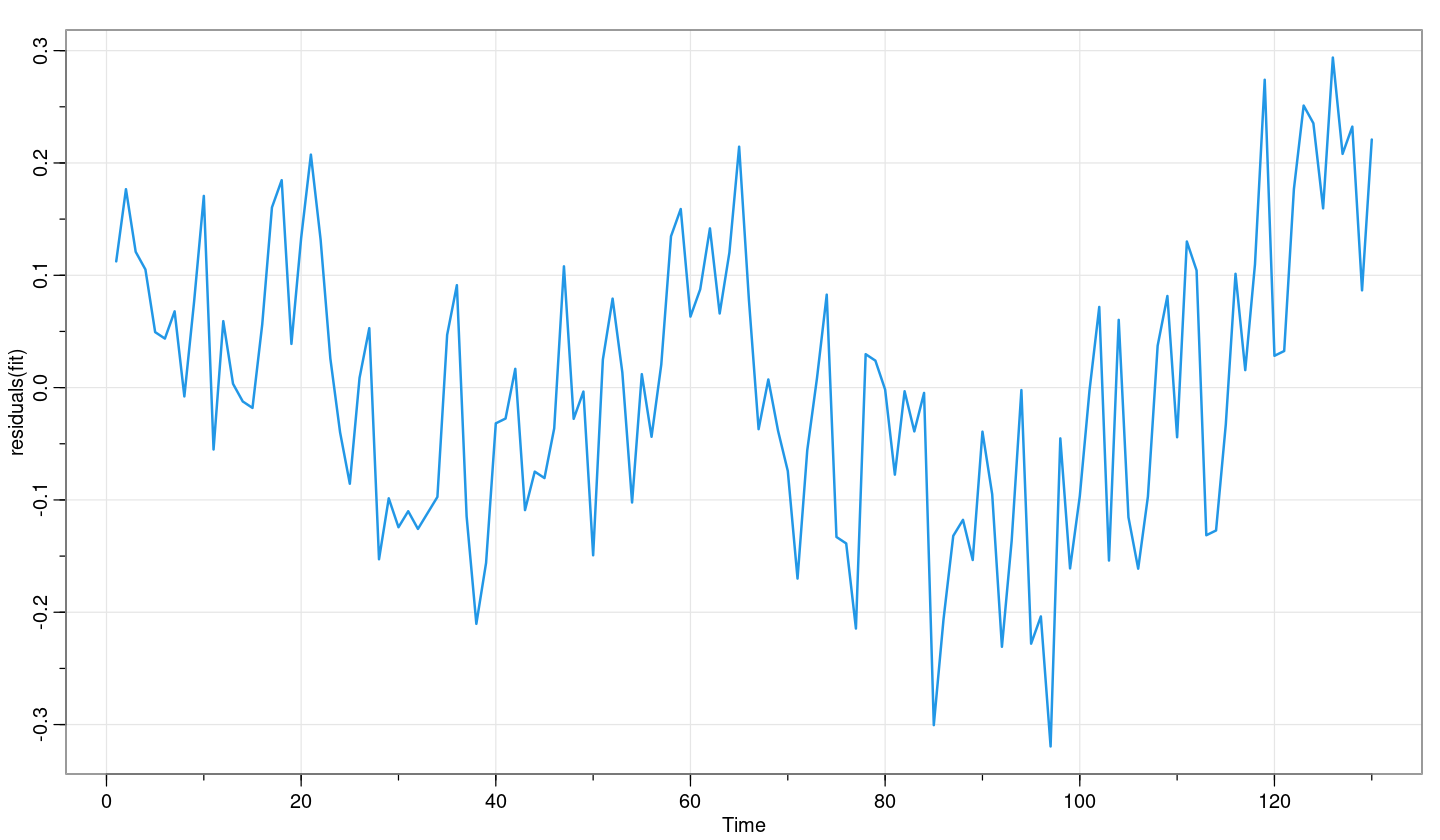

In [12]:
tsplot(residuals(fit), col=4, lwd=2)

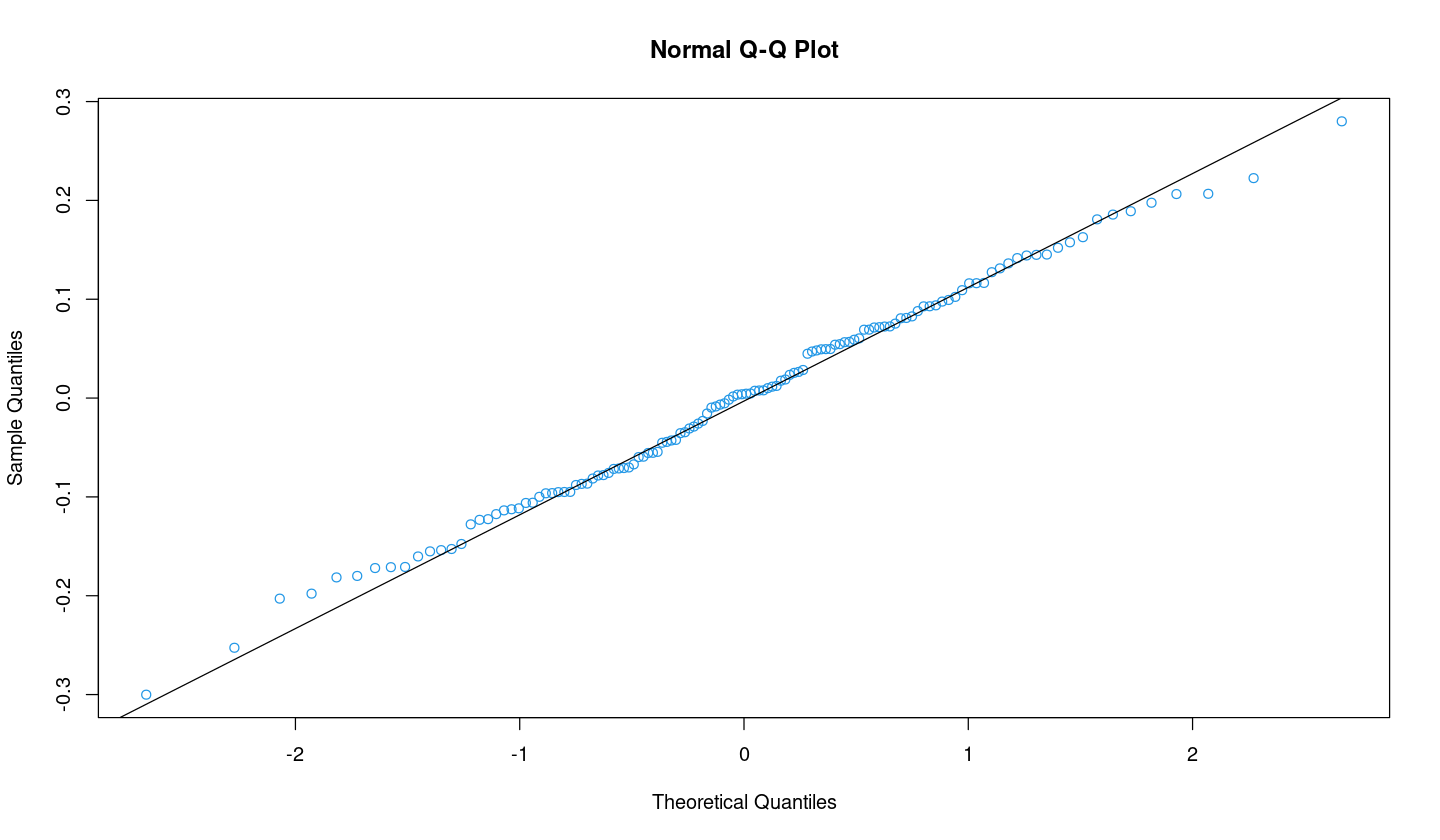

In [13]:
qqnorm(residuals(fit2), col=4)
qqline(residuals(fit2))

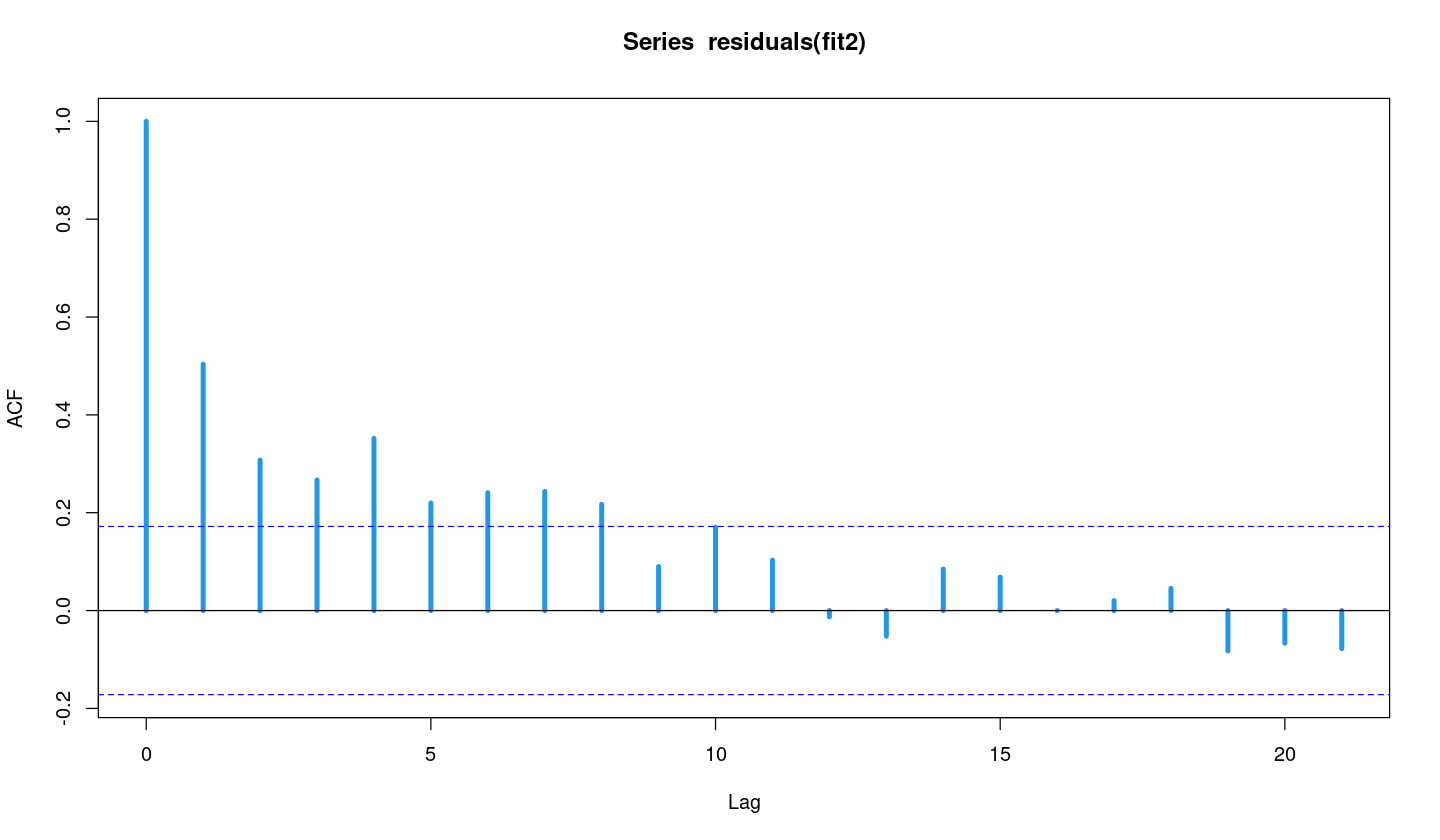

In [14]:
acf(residuals(fit2), col=4, lwd=4)

In [15]:
SSE_quad = sum(residuals(fit2)^2)

R2_quad = (SSE1-SSE_quad)/SSE1

#muestro los valores
SSE1
SSE_quad
R2_quad



[1] 8.054361

[1] 1.558323

[1] 0.8065243

## Akaike information criterion

Es una herramienta para selección de modelos. La idea es usar el estimador de máxima verosimilitud de la varianza $\sigma_w^2$ dado por:

$$\hat{\sigma}_q^2 = \frac{SSE_q}{n}.$$

Siendo $q$ la cantidad de parámetros y $n$ la cantidad de muestras de la serie.

> **Definición (Akaike Information Criterion):** Se define el AIC de un ajuste como:
>
> $$AIC = \log \hat{\sigma}_q^2 + \frac{n+2q}{n}.$$

Cuanto más pequeño el AIC mejor.

## Bayesian information criterion

Es una herramienta análoga a la anterior, que penaliza distinto los parámetros involucrados.

> **Definición (Bayesian Information Criterion):** Se define el BIC de un ajuste como:
>
> $$BIC = \log \hat{\sigma}_q^2 + \frac{q\log(n)}{n}.$$

Cuanto más pequeño el BIC mejor. Funciona mejor que el AIC en muestras grandes.

Calculemos estos valores para los ajustes anteriores.

In [16]:
n=length(gtemp)

AIC_lineal = log(SSE/n) + (n+2*2)/n
AIC_quad = log(SSE_quad/n) + (n+2*3)/n

BIC_lineal = log(SSE/n) + (2*log(n))/n
BIC_quad = log(SSE_quad/n) + (3*log(n))/n

AIC_lineal
AIC_quad

BIC_lineal
BIC_quad


[1] -3.141237

[1] -3.37777

[1] -4.097121

[1] -4.311596

## Ejercicio (Prob 2.1 del libro):

Para los datos de Johnson & Johnson (`jj`), considerados como serie $y_t$, considere la transformación $x_t = \log(y_t)$. Dicha transformación muestra los incrementos relativos o porcentuales (al pasar a logaritmo).

1. Ajustar un modelo de la forma:
$$x_t = \beta_0 t + \sum_{i=1}^4 \beta_i Q_i(t) + w_t$$
siendo $Q_i$ una función que vale $1$ si se está en el trimestre $i$ y $0$ si no.

2. Graficar los datos y superponer los datos ajustados.

3. Calcular los residuos y evaluar el ajuste.

## Ejercicio (ajuste de una señal):

Considere la señal generada más abajo, que consiste en una componente periódica más ruido. 

1. Ajuste un modelo de la forma:
$$x_t = \beta_1 + \beta_2 \cos(2\pi t) + \beta_3 \sin(2\pi t).$$

2. Ajuste un modelo de la forma:
$$x_t = \beta_1 + \beta_2 \cos(2\pi t) + \beta_3 \sin(2\pi t) + \beta_4 \cos(2\pi 2t) + \beta_5 \sin(2\pi 2t).$$
¿Qué captura este segundo modelo?

3. Compare los residuos y los ajustes en cada uno.

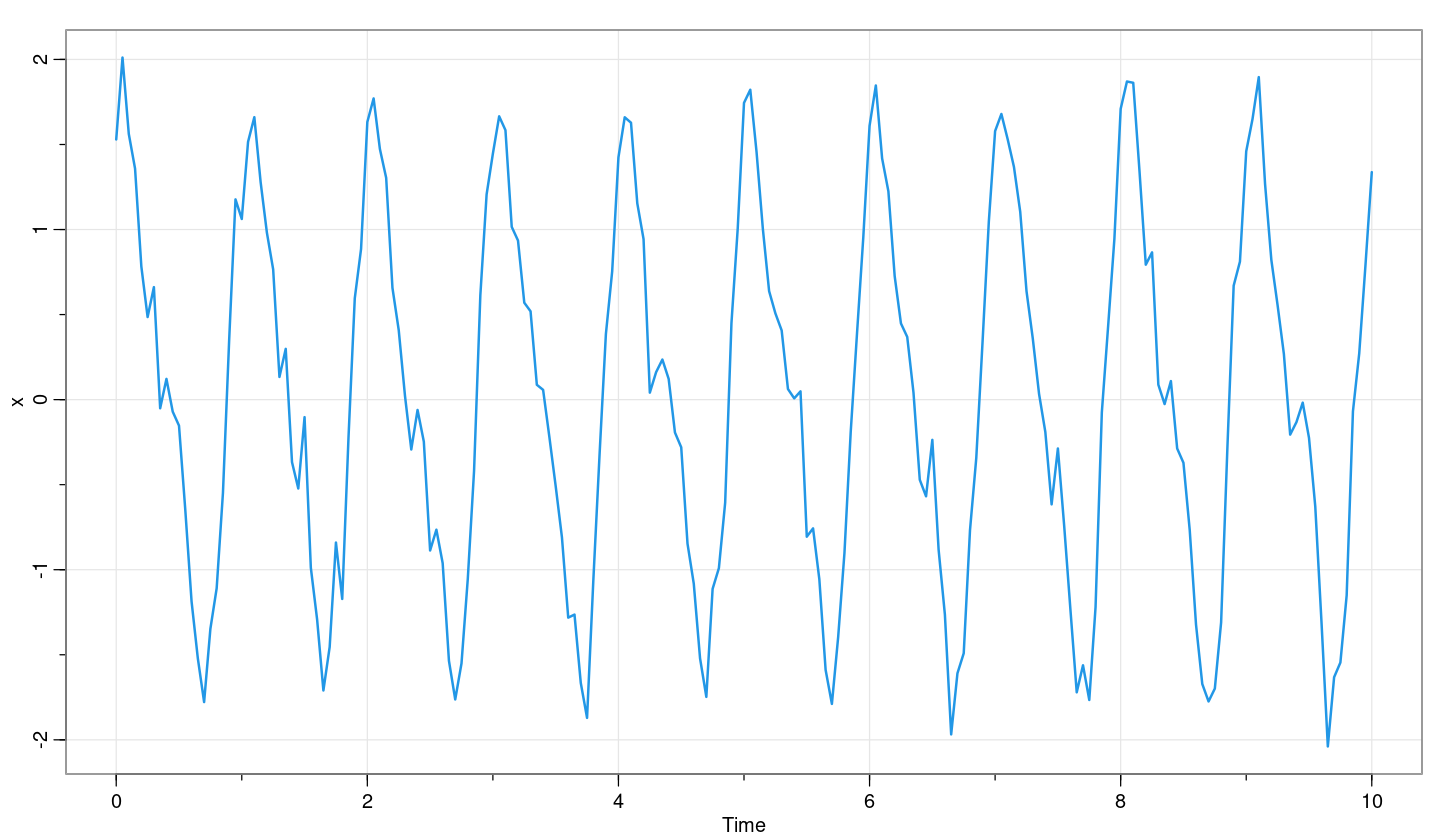

In [17]:
t=seq(0,10, by=0.05)
s = cos(2*pi*t) + sin(2*pi*t) + 0.5*cos(2*pi*2*t)
w=rnorm(length(t),0,0.2)
datos=s+w;

x = ts(datos,start=0,frequency=20)

tsplot(x, lwd=2, col=4)
